In [1]:
import matplotlib.pyplot as plt
from Functions import NeuralNetwork, mse, der_mse, sigmoid, der_sigmoid, linear, der_linear, dataset, softmax, cross_entropy, der_softmax, ReLU, der_ReLU, LeakyReLu, der_LeakyReLu, run_training_experiment, Heatmap_with_labels
import numpy as np
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

np.random.seed(42)
n_samples = 18
x, y_true, y_noise = dataset(n_samples, seed=42)
scaler = StandardScaler()
X = scaler.fit_transform(x.reshape(-1, 1)) # Feature matrix (n_samples
y = y_noise - np.mean(y_noise)
X_train_graph, X_test_graph, y_train_graph, y_test_graph = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Graphs parameters
label_fontsize = 18
label_titlefontsize = 22
label_legendfontsize = 14
tick_size = 14

size_plots = (9, 5)

## Finding Hyperparameters is hard
As previous bestcases might need to be reevaluated by newly selected hyperparameters based on freezing the previous best cases

Nodes: 10, Depth: 1, Time: 0.10 seconds
Nodes: 10, Depth: 2, Time: 0.14 seconds
Nodes: 10, Depth: 3, Time: 0.19 seconds
Nodes: 10, Depth: 4, Time: 0.24 seconds
Nodes: 20, Depth: 1, Time: 0.13 seconds
Nodes: 20, Depth: 2, Time: 0.15 seconds
Nodes: 20, Depth: 3, Time: 0.21 seconds
Nodes: 20, Depth: 4, Time: 0.33 seconds
Nodes: 50, Depth: 1, Time: 0.11 seconds
Nodes: 50, Depth: 2, Time: 0.20 seconds
Nodes: 50, Depth: 3, Time: 0.28 seconds
Nodes: 50, Depth: 4, Time: 0.36 seconds
Nodes: 100, Depth: 1, Time: 0.15 seconds
Nodes: 100, Depth: 2, Time: 0.28 seconds
Nodes: 100, Depth: 3, Time: 0.42 seconds
Nodes: 100, Depth: 4, Time: 0.56 seconds


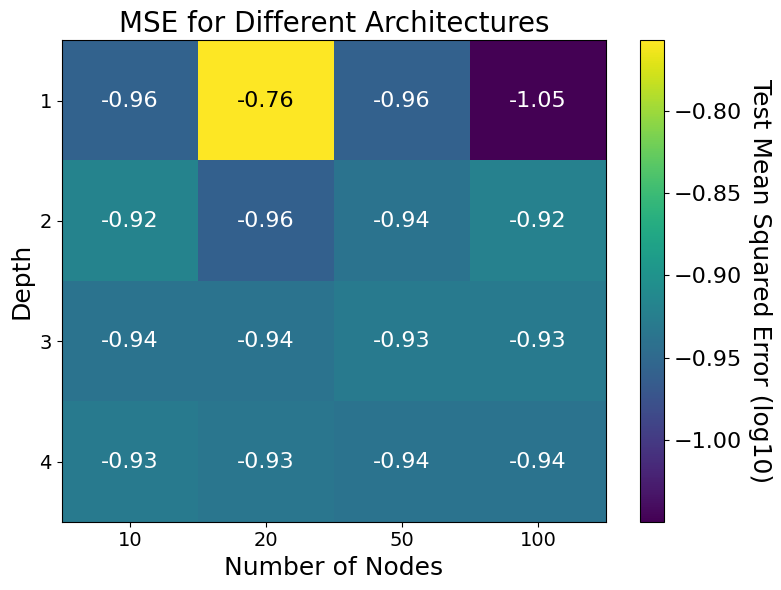

In [2]:
epochs=1000
batch_size=5
learning_rate=0.1
activations=[sigmoid, sigmoid, linear]
activation_ders=[der_sigmoid, der_sigmoid, der_linear] 
layer_sizes=[50,50,1]
method="GD"
cost_func=mse
cost_der_func=der_mse
regularization_type=None
lambda_reg=0.01

# Testing Lists
Nodes = [10, 20, 50, 100]
Depths = [1, 2, 3, 4]

mse_matrix = np.zeros((len(Nodes), len(Depths)))

for i, node in enumerate(Nodes):
    for j, depth in enumerate(Depths):
        start_time = time.perf_counter()
        mse_matrix[i, j],_,_ = run_training_experiment(X_train, y_train, X_test, y_test,
                             n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=learning_rate,
                             activation_funcs=[sigmoid]*depth + [linear], 
                             activation_ders=[der_sigmoid]*depth + [der_linear], 
                             layer_sizes=[node]*depth + [1],
                             cost_func=cost_func,
                             cost_der_func=cost_der_func, 
                             Regularization_type=regularization_type, 
                             lambda_reg=lambda_reg)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Nodes: {node}, Depth: {depth}, Time: {elapsed_time:.2f} seconds")

plot_mse = np.log10(mse_matrix)
Heatmap_with_labels(plot_mse.T, Nodes, Depths, "MSE for Different Architectures",  "Number of Nodes","Depth")

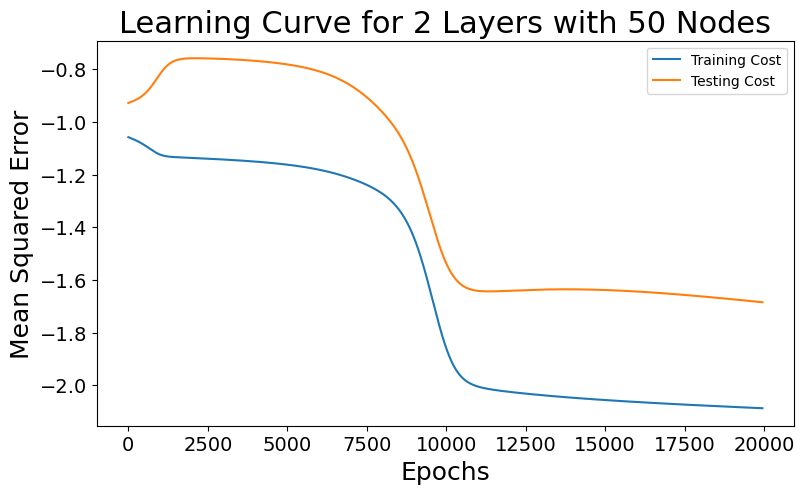

In [3]:
plt.figure(figsize=size_plots)

nn = NeuralNetwork(
            network_input_size=1,
            layer_output_sizes=[50] * 2 + [1],
            activation_funcs=[sigmoid] * 2 + [linear],
            activation_ders=[der_sigmoid] * 2 + [der_linear],
            cost_fun=cost_func,
            cost_der=cost_der_func,
            seed=42
        )
training_scores = []
testing_scores = []
        
learning_rate = 0.1
epochs = 20000
        
for i in range(epochs):
    grads = nn.compute_gradient(X_train, y_train)
    grads = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
    training_scores.append(nn.cost(X_train, y_train))
    testing_scores.append(nn.cost(X_test, y_test))
    nn.update_weights(grads)

training_scores = np.log10(training_scores)
testing_scores = np.log10(testing_scores)
#training_scores = np.log10(training_scores)
#testing_scores = np.log10(testing_scores)
plt.plot(training_scores[50:], label=f'Training Cost')
plt.plot(testing_scores[50:], label=f'Testing Cost')
plt.title(f'Learning Curve for 2 Layers with 50 Nodes', fontsize=label_titlefontsize)
plt.xlabel('Epochs', fontsize=label_fontsize)
plt.ylabel('Mean Squared Error', fontsize=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.savefig('Learning_Curve_2Layers_50Nodes.png', dpi=300)
plt.legend()
plt.show()

Method: GD, Learning Rate: 1e-05, Time: 0.27 seconds
Method: GD, Learning Rate: 0.0001, Time: 0.25 seconds
Method: GD, Learning Rate: 0.001, Time: 0.22 seconds
Method: GD, Learning Rate: 0.01, Time: 0.21 seconds
Method: GD, Learning Rate: 0.1, Time: 0.21 seconds


c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlæring\Eget Arbeid\.venv\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


Method: GD, Learning Rate: 1.0, Time: 0.29 seconds
Method: SGD, Learning Rate: 1e-05, Time: 0.53 seconds
Method: SGD, Learning Rate: 0.0001, Time: 0.51 seconds
Method: SGD, Learning Rate: 0.001, Time: 0.44 seconds
Method: SGD, Learning Rate: 0.01, Time: 0.46 seconds
Method: SGD, Learning Rate: 0.1, Time: 0.41 seconds
Method: SGD, Learning Rate: 1.0, Time: 0.45 seconds
Method: Adam, Learning Rate: 1e-05, Time: 0.67 seconds
Method: Adam, Learning Rate: 0.0001, Time: 0.64 seconds
Method: Adam, Learning Rate: 0.001, Time: 0.63 seconds
Method: Adam, Learning Rate: 0.01, Time: 0.63 seconds
Method: Adam, Learning Rate: 0.1, Time: 0.64 seconds
Method: Adam, Learning Rate: 1.0, Time: 0.63 seconds
Method: RMSprop, Learning Rate: 1e-05, Time: 0.54 seconds
Method: RMSprop, Learning Rate: 0.0001, Time: 0.53 seconds
Method: RMSprop, Learning Rate: 0.001, Time: 0.53 seconds
Method: RMSprop, Learning Rate: 0.01, Time: 0.53 seconds
Method: RMSprop, Learning Rate: 0.1, Time: 0.54 seconds
Method: RMSprop

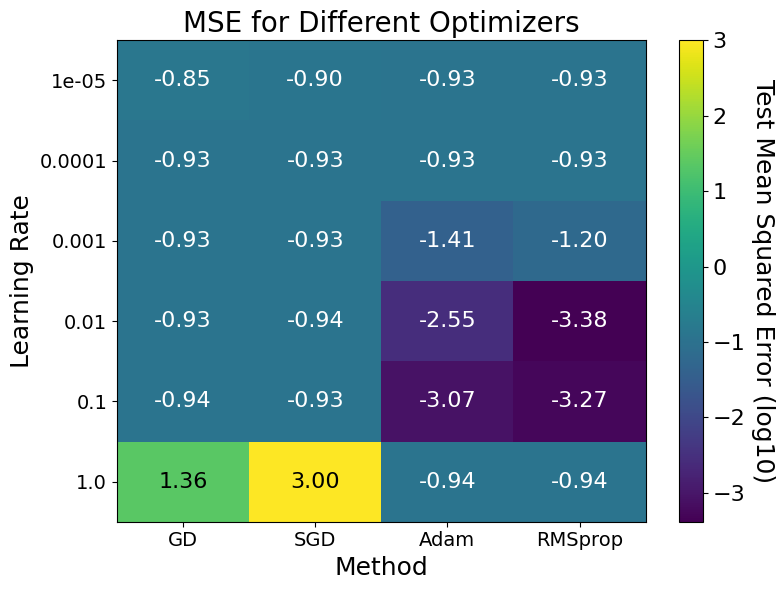

In [4]:
epochs=1000
batch_size=5
learning_rate=0.1
activations=[sigmoid, sigmoid, linear]
activation_ders=[der_sigmoid, der_sigmoid, der_linear] 
layer_sizes=[50,50,1]
method="GD"
cost_func=mse
cost_der_func=der_mse
regularization_type=None
lambda_reg=0.01

# Testing Lists
Methods = ["GD", "SGD", "Adam", "RMSprop"]
learning_rates = np.logspace(-5, 0, 6)

mse_matrix = np.zeros((len(Methods), len(learning_rates)))

for i, method in enumerate(Methods):
    for j, lr in enumerate(learning_rates):
        start_time = time.perf_counter()
        mse_matrix[i, j],_,_ = run_training_experiment(X_train, y_train, X_test, y_test,
                             n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=lr,
                             activation_funcs=activations, 
                             activation_ders=activation_ders, 
                             layer_sizes=layer_sizes,
                             cost_func=cost_func,
                             cost_der_func=cost_der_func, 
                             Regularization_type=regularization_type, 
                             lambda_reg=lambda_reg)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Method: {method}, Learning Rate: {lr}, Time: {elapsed_time:.2f} seconds")

plot_mse = np.log10(mse_matrix)
Heatmap_with_labels(plot_mse.T, Methods, learning_rates, "MSE for Different Optimizers",  "Method","Learning Rate")

  0%|          | 0/4 [00:00<?, ?it/s]

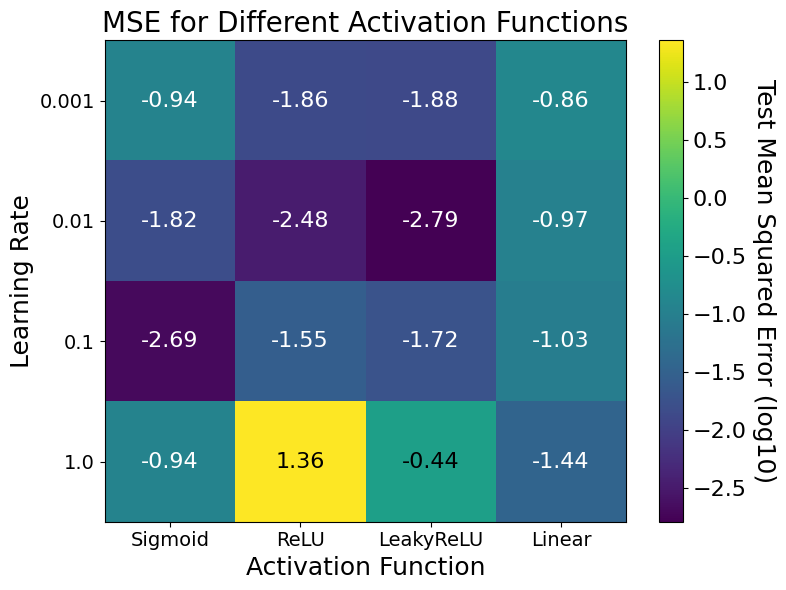

In [5]:
from tqdm.notebook import tqdm


epochs=120
batch_size=4
learning_rate=0.1
activations=[sigmoid, sigmoid, linear]
activation_ders=[der_sigmoid, der_sigmoid,der_linear] 
layer_sizes=[50,50,1]
method="Adam"
cost_func=mse
cost_der_func=der_mse
regularization_type=None
lambda_reg=1e-03

# Testing Lists
activation_names = ['Sigmoid', 'ReLU', 'LeakyReLU', 'Linear']
activation = [(sigmoid, der_sigmoid), (ReLU, der_ReLU), (LeakyReLu, der_LeakyReLu),(linear, der_linear)]
learning_rates = np.logspace(-3, 0, 4)

mse_matrix = np.zeros((len(activation), len(learning_rates)))

for i, (act, der) in tqdm(enumerate(activation), total=len(activation)):
    for j, lr in enumerate(learning_rates):
        start_time = time.perf_counter()
        mse_matrix[i, j],_,_ = run_training_experiment(X_train, y_train, X_test, y_test,
                             n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=lr,
                             activation_funcs=[act]*2 + [linear], 
                             activation_ders=[der]*2 + [der_linear], 
                             layer_sizes=[50]*2 + [1],
                             cost_func=cost_func,
                             cost_der_func=cost_der_func, 
                             Regularization_type=regularization_type, 
                             lambda_reg=lambda_reg)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time

plot_mse = np.log10(mse_matrix)
Heatmap_with_labels(plot_mse.T, activation_names, learning_rates, "MSE for Different Activation Functions",  "Activation Function","Learning Rate")

## L0 best solution

Elapsed time for training: 0.45 seconds
Final Test MSE with best parameters: -2.834386 at 82 epochs


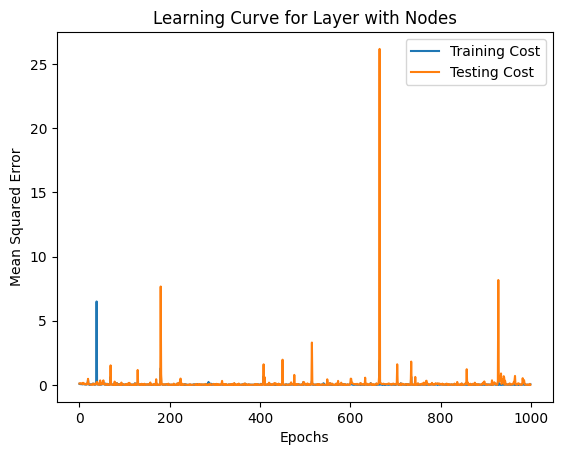

In [6]:
# more test data
#X_extra, y_extra, y_extra_noise = dataset(100)
#X_extra = scaler.transform(X_extra.reshape(-1, 1))
#y_extra_centered = y_extra_noise - np.mean(y_extra_noise)
import time
epochs=1000
batch_size=5
learning_rate=0.1
activations=[LeakyReLu, LeakyReLu, linear]
activation_ders=[der_LeakyReLu, der_LeakyReLu,der_linear] 
layer_sizes=[10,10,1]
method="RMSprop"
cost_func=mse
cost_der_func=der_mse
regularization_type=None
lambda_reg=1e-05

start_time = time.time()
best_score, best_iteration,best_model_L0,training_scores, testing_scores= run_training_experiment(X_train,       y_train, 
                                    X_test, y_test,
                                    n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=learning_rate,
                                    activation_funcs=activations,
                                    activation_ders=activation_ders,
                                    layer_sizes=layer_sizes,
                                    cost_func=cost_func,
                                    cost_der_func=cost_der_func, 
                                    Regularization_type=regularization_type, 
                                    lambda_reg=lambda_reg,
                                    best_model_iteration=True)
# Plotting the learning curves
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for training: {elapsed_time:.2f} seconds")

print(f"Final Test MSE with best parameters: {np.log10(best_score):.6f} at {best_iteration} epochs")
plt.plot(training_scores, label=f'Training Cost')
plt.plot(testing_scores, label=f'Testing Cost ')
plt.title(f'Learning Curve for Layer with Nodes')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

-2.8343862219530367
-1.8309759924609668


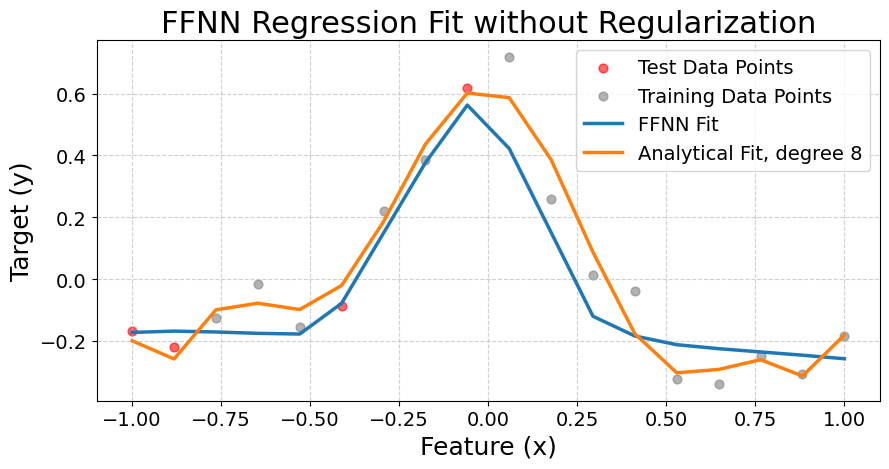

In [7]:
from utils import polynomial_features, OLS_parameters
predictions = best_model_L0.predict(X)

fig, ax = plt.subplots(figsize=size_plots)

# Call plotting methods on 'ax', not 'fig'
ax.scatter(X_test_graph, y_test_graph, label='Test Data Points', color='red', alpha=0.6, s=40)
ax.scatter(X_train_graph, y_train_graph, label='Training Data Points', color='gray', alpha=0.6, s=40)
ax.plot(x, predictions, label=f'FFNN Fit', linewidth=2.5) # Used X_plot for a smooth line

# Adding our best analytical OLS fit for comparison
X_analytical = polynomial_features(x, 8)
X_analytical_scaled = scaler.fit_transform(X_analytical)
X_analytical_train, _, y_analytical_train, _ = train_test_split(X_analytical_scaled, y, test_size=0.2, random_state=42)
beta_theta_L0 = OLS_parameters(X_analytical_train, y_analytical_train)
y_pred = X_analytical_scaled @ beta_theta_L0
ax.plot(x, y_pred, label=f'Analytical Fit, degree 8', linewidth=2.5)

# Call set methods on 'ax'
ax.set_xlabel("Feature (x)", fontsize=label_fontsize)
ax.set_ylabel("Target (y)", fontsize=label_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_size)
ax.set_title("FFNN Regression Fit without Regularization", fontsize=label_titlefontsize)
ax.legend(fontsize=label_legendfontsize)
ax.grid(True, linestyle='--', alpha=0.6)

# --- Save the final combined plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("ffnn_fit_plot_L0.png") # Use savefig()
print(np.log10(best_model_L0.cost(X_test, y_test)))
print(np.log10(best_model_L0.cost(X_train, y_train)))

In [8]:
x_extra, y_true_extra, y_noise_extra = dataset(100, seed=28)
y_extra_centered = y_noise_extra - np.mean(y_noise_extra)
X_extra_analytical = polynomial_features(x_extra, 8)

X_extra_analytical_scaled_0 = StandardScaler().fit_transform(X_extra_analytical)
X_extra = StandardScaler().fit_transform(x_extra.reshape(-1, 1))

print(np.log10(best_model_L0.cost(X_extra, y_extra_centered)))
print(np.log10(mse(X_extra_analytical_scaled_0 @ beta_theta_L0, y_extra_centered)))



-1.694788528454415
-1.6983612089059341


  0%|          | 0/4 [00:00<?, ?it/s]

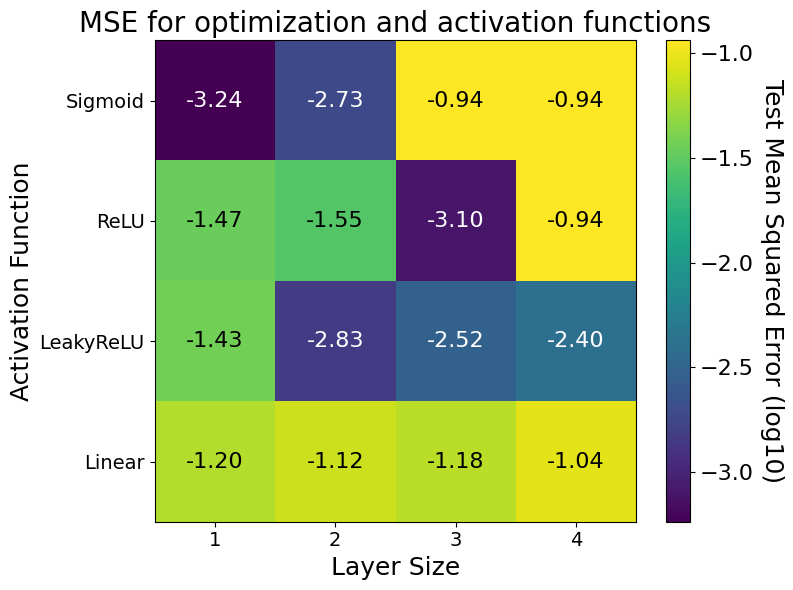

In [9]:
## Finding a fun graph for the report
epochs=200
batch_size=5
learning_rate=0.1
activations=[LeakyReLu, LeakyReLu, linear]
activation_ders=[der_LeakyReLu, der_LeakyReLu,der_linear] 
layer_sizes=[10,10,1]
method="RMSprop"
cost_func=mse
cost_der_func=der_mse
regularization_type=None
lambda_reg=1e-03

# Testing Lists
layer_sizes = [1,2,3,4]
activation = [(sigmoid, der_sigmoid), (ReLU, der_ReLU), (LeakyReLu, der_LeakyReLu), (linear, der_linear)]

mse_matrix = np.zeros((len(layer_sizes), len(activation)))

for i, layer_size in tqdm(enumerate(layer_sizes), total=len(layer_sizes)):
    for j, (act, der_act) in enumerate(activation):
        start_time = time.perf_counter()
        mse_matrix[i, j],_,_ = run_training_experiment(X_train,       y_train, 
                                    X_test, y_test,
                                    n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=learning_rate,
                                    activation_funcs=[act]*layer_size + [linear],
                                    activation_ders=[der_act]*layer_size + [der_linear],
                                    layer_sizes=[10] * layer_size + [1],
                                    cost_func=cost_func,
                                    cost_der_func=cost_der_func, 
                                    Regularization_type=regularization_type, 
                                    lambda_reg=lambda_reg
                                    )

activation_names = ['Sigmoid', 'ReLU', 'LeakyReLU', 'Linear']
plot_mse = np.log10(mse_matrix)
Heatmap_with_labels(plot_mse.T, layer_sizes, activation_names, "MSE for optimization and activation functions",  "Layer Size","Activation Function")

## L1



Elapsed time for training: 0.36 seconds
Final Test MSE with best parameters: -3.000583 at 619 epochs


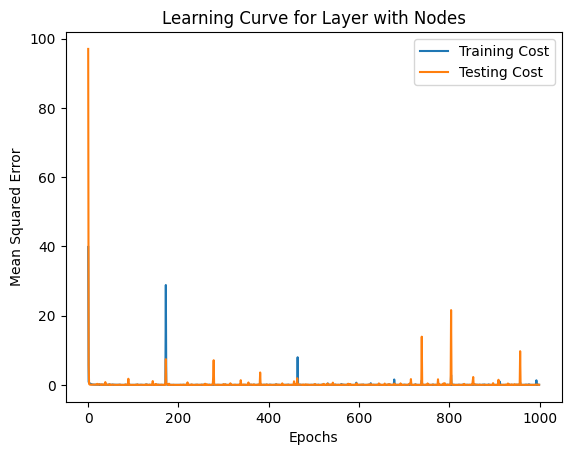

In [10]:
import time
epochs=1000
batch_size=10
learning_rate=0.1
activations=[LeakyReLu, LeakyReLu, linear]
activation_ders=[der_LeakyReLu, der_LeakyReLu,der_linear] 
layer_sizes=[20,20,1]
method="RMSprop"
cost_func=mse
cost_der_func=der_mse
regularization_type="L1"
lambda_reg=1e-05

start_time = time.time()
best_score, best_iteration,best_model_L1,training_scores, testing_scores= run_training_experiment(X_train,       y_train, 
                                    X_test, y_test,
                                    n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=learning_rate,
                                    activation_funcs=activations,
                                    activation_ders=activation_ders,
                                    layer_sizes=layer_sizes,
                                    cost_func=cost_func,
                                    cost_der_func=cost_der_func, 
                                    Regularization_type=regularization_type, 
                                    lambda_reg=lambda_reg,
                                    best_model_iteration=True)
# Plotting the learning curves
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for training: {elapsed_time:.2f} seconds")
print(f"Final Test MSE with best parameters: {np.log10(best_score):.6f} at {best_iteration} epochs")
plt.plot(training_scores, label=f'Training Cost')
plt.plot(testing_scores, label=f'Testing Cost ')
plt.title(f'Learning Curve for Layer with Nodes')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Elapsed time for L1 training: 0.17 seconds
-3.000583208305953
-1.912267984343777


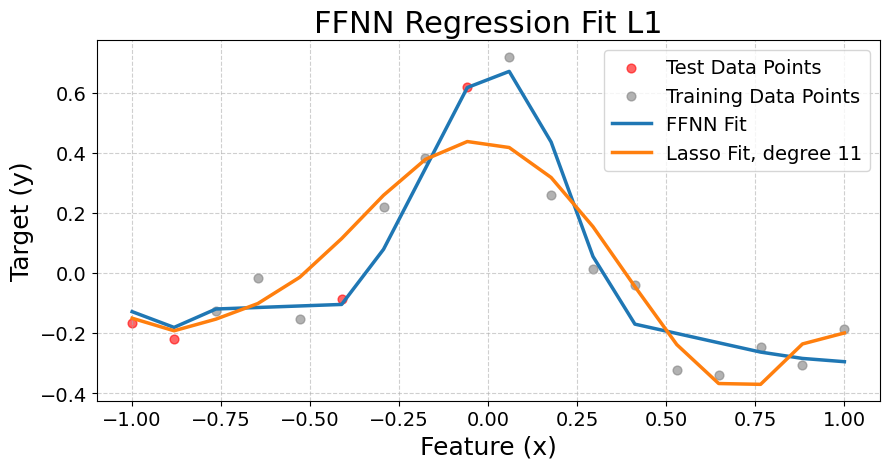

In [11]:
from utils import polynomial_features, OLS_parameters, Gradient_OLS
predictions = best_model_L1.predict(X)

fig, ax = plt.subplots(figsize=size_plots)

# Call plotting methods on 'ax', not 'fig'
ax.scatter(X_test_graph, y_test_graph, label='Test Data Points', color='red', alpha=0.6, s=40)
ax.scatter(X_train_graph, y_train_graph, label='Training Data Points', color='gray', alpha=0.6, s=40)
ax.plot(x, predictions, label=f'FFNN Fit', linewidth=2.5) # Used X_plot for a smooth line

# Adding our best analytical OLS fit for comparison
X_analytical = polynomial_features(x, 11)
X_analytical_scaled = StandardScaler().fit_transform(X_analytical)
X_analytical_train, X_analytical_test, y_analytical_train, y_analytical_test = train_test_split(X_analytical_scaled, y, test_size=0.2, random_state=42)

start_time = time.time()
eta = 0.01
lam = 0.001
best_score_L1 = np.inf
np.random.seed(42)
theta = np.random.randn(X_analytical_train.shape[1],1)
for epoch in range(10000):
    grad_OLS = Gradient_OLS(X_analytical_train, y_analytical_train, eta=eta,theta=theta, n=X_analytical_train.shape[0]) 
    theta -= eta * grad_OLS
    theta =  np.sign(theta) * np.maximum(0, np.abs(theta) - eta * lam)
    if mse(X_analytical_test @ theta, y_analytical_test) < best_score_L1:
        best_score_L1 = mse(X_analytical_train @ theta, y_analytical_train)
        beta_theta_L1 = copy.deepcopy(theta)

        
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for L1 training: {elapsed_time:.2f} seconds")

y_pred = X_analytical_scaled @ beta_theta_L1
ax.plot(x, y_pred, label=f'Lasso Fit, degree 11', linewidth=2.5)

# Call set methods on 'ax'
ax.set_xlabel("Feature (x)", fontsize=label_fontsize)
ax.set_ylabel("Target (y)", fontsize=label_fontsize)
ax.set_title("FFNN Regression Fit L1", fontsize=label_titlefontsize)
ax.legend(fontsize=label_legendfontsize)
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=tick_size)
# --- Save the final combined plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("ffnn_fit_plot_L1.png") # Use savefig()
print(np.log10(best_model_L1.cost(X_test, y_test)))
print(np.log10(best_score_L1))

In [12]:
X_extra_analytical = polynomial_features(x_extra, 11)

X_extra_analytical_scaled_1 = StandardScaler().fit_transform(X_extra_analytical)
X_extra = StandardScaler().fit_transform(x_extra.reshape(-1, 1))

print(np.log10(best_model_L1.cost(X_extra, y_extra_centered)))
print(np.log10(mse(X_extra_analytical_scaled_1 @ beta_theta_L1, y_extra_centered)))



-1.8207283282653612
-1.5816011170231339


## L2


Elapsed time for training: 0.76 seconds
Final Test MSE with best parameters: -2.261498 at 996 epochs


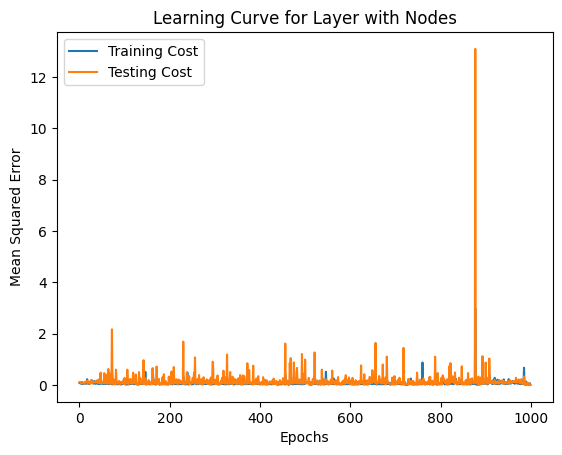

In [13]:
import time
epochs=1000
batch_size=3
learning_rate=0.1
activations=[LeakyReLu, LeakyReLu, linear]
activation_ders=[der_LeakyReLu, der_LeakyReLu,der_linear] 
layer_sizes=[10,10,1]
method="RMSprop"
cost_func=mse
cost_der_func=der_mse
regularization_type="L2"
lambda_reg=2e-04

start_time = time.time()
best_score, best_iteration,best_model_L2,training_scores, testing_scores= run_training_experiment(X_train,       y_train, 
                                    X_test, y_test,
                                    n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=learning_rate,
                                    activation_funcs=activations,
                                    activation_ders=activation_ders,
                                    layer_sizes=layer_sizes,
                                    cost_func=cost_func,
                                    cost_der_func=cost_der_func, 
                                    Regularization_type=regularization_type, 
                                    lambda_reg=lambda_reg,
                                    best_model_iteration=True)
# Plotting the learning curves
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for training: {elapsed_time:.2f} seconds")
print(f"Final Test MSE with best parameters: {np.log10(best_score):.6f} at {best_iteration} epochs")
plt.plot(training_scores, label=f'Training Cost')
plt.plot(testing_scores, label=f'Testing Cost ')
plt.title(f'Learning Curve for Layer with Nodes')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

-2.2614975490158966


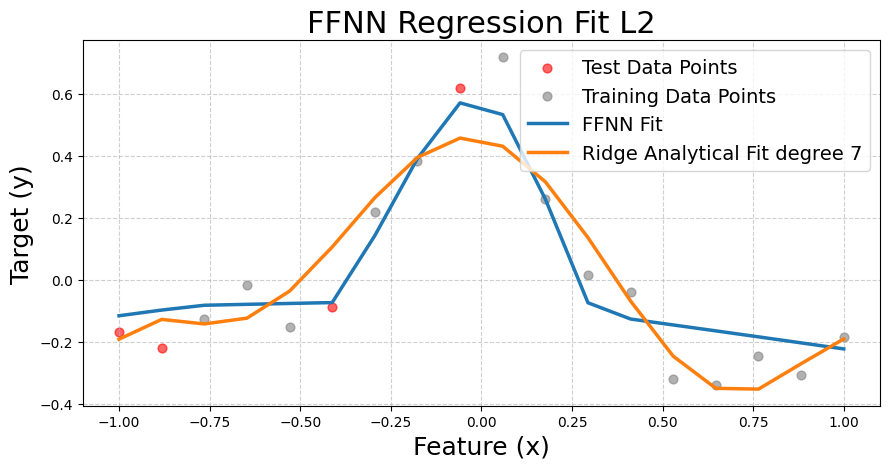

In [14]:
from utils import polynomial_features, OLS_parameters, Ridge_parameters
predictions = best_model_L2.predict(X)

fig, ax = plt.subplots(figsize=size_plots)

# Call plotting methods on 'ax', not 'fig'
ax.scatter(X_test_graph, y_test_graph, label='Test Data Points', color='red', alpha=0.6, s=40)
ax.scatter(X_train_graph, y_train_graph, label='Training Data Points', color='gray', alpha=0.6, s=40)
ax.plot(x, predictions, label=f'FFNN Fit', linewidth=2.5) # Used X_plot for a smooth line

# Adding our best analytical OLS fit for comparison
X_analytical = polynomial_features(x, 7)
X_analytical_scaled = StandardScaler().fit_transform(X_analytical)
X_analytical_train, _, y_analytical_train, _ = train_test_split(X_analytical_scaled, y, test_size=0.2, random_state=42)
beta_theta_L2 = Ridge_parameters(X_analytical_train, y_analytical_train,regularization=0.01)
y_pred = X_analytical_scaled @ beta_theta_L2
ax.plot(x, y_pred, label=f'Ridge Analytical Fit degree 7', linewidth=2.5)

# Call set methods on 'ax'
ax.set_xlabel("Feature (x)", fontsize=label_fontsize)
ax.set_ylabel("Target (y)", fontsize=label_fontsize)
ax.set_title("FFNN Regression Fit L2", fontsize=label_titlefontsize)
ax.legend(fontsize=label_legendfontsize)
ax.grid(True, linestyle='--', alpha=0.6)

# --- Save the final combined plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("ffnn_fit_plot_L2.png") # Use savefig()
print(np.log10(best_model_L2.cost(X_test, y_test)))

In [15]:
X_extra_analytical = polynomial_features(x_extra, 7)

X_extra_analytical_scaled_2 = StandardScaler().fit_transform(X_extra_analytical)
X_extra = StandardScaler().fit_transform(x_extra.reshape(-1, 1))

print(np.log10(best_model_L2.cost(X_extra, y_extra_centered)))
print(np.log10(mse(X_extra_analytical_scaled_2 @ beta_theta_L2, y_extra_centered)))



-1.750701533813841
-1.5960572007467873


# Comparative analysis of these models on the datasets

-1.8207283282653612
-1.5960572007467873


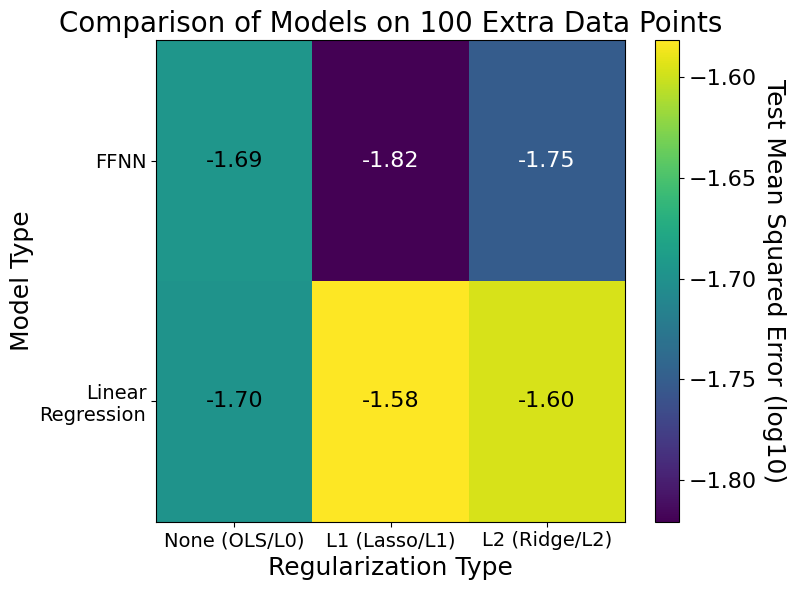

In [16]:
x_labels = [ "FFNN","Linear\nRegression"]
y_labels = ["None (OLS/L0)", "L1 (Lasso/L1)", "L2 (Ridge/L2)"]

heatmap_comparison = np.zeros((2, 3))
heatmap_comparison[0, 0] = np.log10(best_model_L0.cost(X_extra, y_extra_centered))
heatmap_comparison[0, 1] = np.log10(best_model_L1.cost(X_extra, y_extra_centered))
heatmap_comparison[0, 2] = np.log10(best_model_L2.cost(X_extra, y_extra_centered))
heatmap_comparison[1, 0] = np.log10(mse(X_extra_analytical_scaled_0 @ beta_theta_L0, y_extra_centered))
heatmap_comparison[1, 1] = np.log10(mse(X_extra_analytical_scaled_1 @ beta_theta_L1, y_extra_centered))
heatmap_comparison[1, 2] = np.log10(mse(X_extra_analytical_scaled_2 @ beta_theta_L2, y_extra_centered))

print(heatmap_comparison[0,1])
print(np.log10(mse(X_extra_analytical_scaled_2 @ beta_theta_L2, y_extra_centered)))


Heatmap_with_labels(heatmap_comparison, 
                    y_labels,  # X-axis label for the transposed plot
                    x_labels,  # Y-axis label for the transposed plot
                    "Comparison of Models on 100 Extra Data Points", 
                    "Regularization Type", 
                    "Model Type")



## Classification

Final Test Cross Entropy with best parameters: 0.109523 at 17 epochs


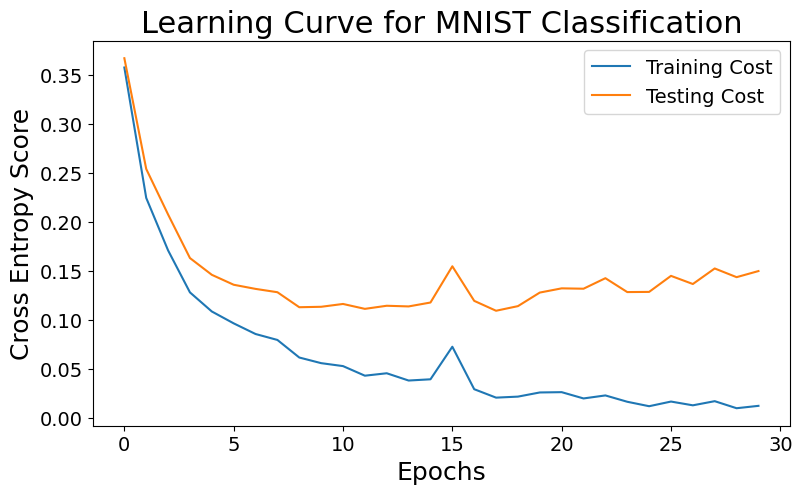

Final Test on MNIST: 0.109523
Final Test Accuracy on MNIST: 97.51%
Final Test Accuracy on MNIST: 97.51%


In [17]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
#New Dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data / 255.0  # Normalize pixel values to [0, 1]
y = mnist.target
y = y.astype(int)
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_onehot = encoder.fit_transform(y.reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, random_state=42, train_size=0.8, test_size=0.2)

epochs=30
batch_size=64
learning_rate=0.001
activations=[sigmoid, sigmoid,sigmoid, softmax]
activation_ders=[der_sigmoid, der_sigmoid,der_sigmoid, der_softmax] 
layer_sizes=[100,200,100,10]
method="RMSprop"
cost_func=cross_entropy
cost_der_func=der_softmax
regularization_type='L2'
lambda_reg=1e-04

best_score, best_iteration,best_model,training_scores, testing_scores= run_training_experiment(X_train,       y_train, 
                                    X_test, y_test,
                                    n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=learning_rate,
                                    activation_funcs=activations,
                                    activation_ders=activation_ders,
                                    layer_sizes=layer_sizes,
                                    cost_func=cost_func,
                                    cost_der_func=cost_der_func, 
                                    Regularization_type=regularization_type, 
                                    lambda_reg=lambda_reg,
                                    best_model_iteration=True)
# Plotting the learning curves
print(f"Final Test Cross Entropy with best parameters: {best_score:.6f} at {best_iteration} epochs")
fig , ax = plt.subplots(figsize=size_plots)
ax.plot(training_scores, label=f'Training Cost')
ax.plot(testing_scores, label=f'Testing Cost ')
ax.set_title(f'Learning Curve for MNIST Classification', fontsize=label_titlefontsize)
ax.set_xlabel('Epochs', fontsize=label_fontsize)
ax.set_ylabel('Cross Entropy Score', fontsize=label_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_size)
ax.legend(fontsize=label_legendfontsize)
plt.savefig("MNIST_Learning_Curve.png")
plt.show()

final_cost = best_model.cost(X_test, y_test)
print(f"Final Test on MNIST: {final_cost:.6f}")

test_predictions = best_model.predict(X_test)
predicted_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

accuracy = np.mean(predicted_labels == true_labels)
print(f"Final Test Accuracy on MNIST: {accuracy * 100:.2f}%")

test_predictions = best_model.predict(X_test)
predicted_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

accuracy = np.mean(predicted_labels == true_labels)
print(f"Final Test Accuracy on MNIST: {accuracy * 100:.2f}%")




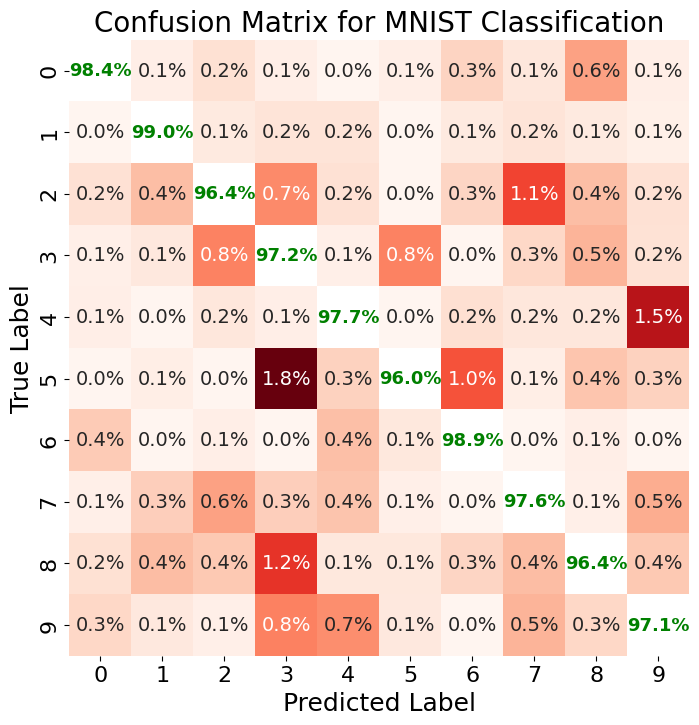

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
y_probas = best_model.predict(X_test)

# --- 2. Convert probabilities and one-hot labels to 1D class labels ---
# np.argmax(..., axis=1) finds the index of the highest value in each row
y_pred_labels = np.argmax(y_probas, axis=1)
y_true_labels = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_true_labels, y_pred_labels, normalize="true")

failure_matrix = cm.copy()
# Set the diagonal (successes) to NaN (Not a Number)
np.fill_diagonal(failure_matrix, np.nan)

# --- 3. Plot the Failure Heatmap ---
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    failure_matrix,
    annot=True,          # Show the failure percentages
    fmt=".1%",           # Format as percentages
    cmap="Reds",         # Use a "hot" colormap like Reds
    ax=ax,
    cbar=False,     # The color bar isn't needed, the numbers are key
    annot_kws={"size": 14}
)

n_classes = cm.shape[0]
for i in range(n_classes):
    text_to_add = f"{cm[i, i]:.1%}" # Get the diagonal value (e.g., "96.45%")
    ax.text(
        i + 0.5,  #
        i + 0.5,  
        text_to_add,
        ha="center", 
        va="center", 
        color="green",
        fontweight="bold",
        fontsize=13
    )

ax.set_title("Confusion Matrix for MNIST Classification", fontsize=20)
ax.set_xlabel("Predicted Label", fontsize=18)
ax.set_ylabel("True Label", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("MNIST_Confusion_Matrix.png")
plt.show()

Found 23 images that were actually 5 but predicted as 3.


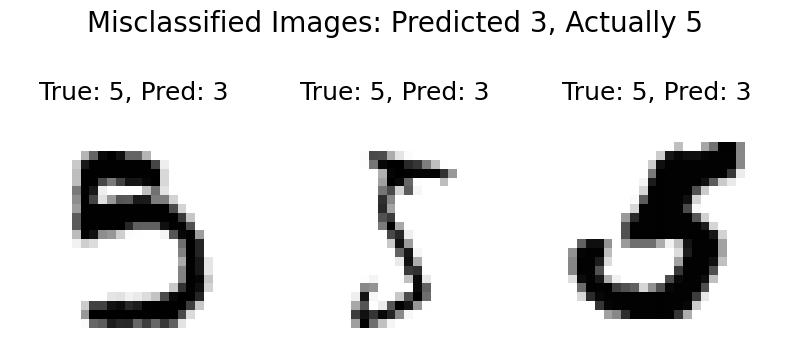

In [19]:
#What was classified wrong

misclassified_indices = np.where((true_labels == 5) & (predicted_labels == 3))[0]


print(f"Found {len(misclassified_indices)} images that were actually 5 but predicted as 3.")


cols = 3
fig, axes = plt.subplots(1, cols, figsize=(8, 4))
axes = axes.flatten() # Make it easy to iterate
for i, img_index in enumerate(misclassified_indices[:3]):
    # 3. Get the image from X_test and reshape it to 28x28
    image = X_test[img_index].reshape(28, 28)
    
    # 4. Plot the image
    axes[i].imshow(image, cmap='gray_r') # 'gray_r' for black digits on white
    axes[i].set_title(f"True: 5, Pred: 3", fontsize=18)
    axes[i].axis('off') # Hide the x/y axes

plt.suptitle("Misclassified Images: Predicted 3, Actually 5", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("misclassified_5_as_3.png")
plt.show()


### Heatmap for Regularization on Classification

In [20]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
#New Dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data / 255.0  # Normalize pixel values to [0, 1]
y = mnist.target
y = y.astype(int)
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_onehot = encoder.fit_transform(y.reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, random_state=42, train_size=0.8, test_size=0.2)

epochs=20
batch_size=64
learning_rate=0.001
activations=[sigmoid, sigmoid,sigmoid, softmax]
activation_ders=[der_sigmoid, der_sigmoid,der_sigmoid, der_softmax] 
layer_sizes=[100,200,100,10]
method="RMSprop"
cost_func=cross_entropy
cost_der_func=der_softmax
regularization_type='L2'
lambda_reg=1e-04

# Testing different regularization types and lambda values
Regularization_types = [None, 'L1', 'L2']
regularization_parameters = np.logspace(-4, -1, 4)

mse_matrix = np.zeros((len(Regularization_types), len(regularization_parameters)))

for i, reg in enumerate(Regularization_types):
    for j, lam in enumerate(regularization_parameters):
        start_time = time.perf_counter()
        mse_matrix[i, j],_,_ = run_training_experiment(X_train, y_train, X_test, y_test,
                             n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=learning_rate,
                             activation_funcs=activations, 
                             activation_ders=activation_ders, 
                             layer_sizes=layer_sizes,
                             cost_func=cost_func,
                             cost_der_func=cost_der_func, 
                             Regularization_type=reg, 
                             lambda_reg=lam)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Regularization: {reg}, Lambda: {lam}, Time: {elapsed_time:.2f} seconds")

#Heatmap_with_labels(plot_mse.T, Regularization_types, regularization_parameters, "MSE for Different Architectures",  "Regularization Type","Lambda")


Regularization: None, Lambda: 0.0001, Time: 56.08 seconds
Regularization: None, Lambda: 0.001, Time: 59.79 seconds
Regularization: None, Lambda: 0.01, Time: 62.72 seconds
Regularization: None, Lambda: 0.1, Time: 64.02 seconds
Regularization: L1, Lambda: 0.0001, Time: 548.73 seconds
Regularization: L1, Lambda: 0.001, Time: 104.66 seconds
Regularization: L1, Lambda: 0.01, Time: 102.40 seconds
Regularization: L1, Lambda: 0.1, Time: 102.73 seconds
Regularization: L2, Lambda: 0.0001, Time: 89.17 seconds
Regularization: L2, Lambda: 0.001, Time: 92.76 seconds
Regularization: L2, Lambda: 0.01, Time: 96.92 seconds
Regularization: L2, Lambda: 0.1, Time: 96.39 seconds


In [21]:
#Heatmap_with_labels(mse_matrix.T, Regularization_types, regularization_parameters, "Cross Entropy for Different Regularization Techniques",  "Regularization Type","Lambda")